# Chú thích hình ảnh


Trong sổ tay này, chúng ta sẽ tìm hiểu cách chú thích hình ảnh bằng OpenCV. Chúng ta sẽ học cách thực hiện các chú thích sau cho hình ảnh.

* Vẽ đường thẳng
* Vẽ hình tròn
* Vẽ hình chữ nhật
* Thêm văn bản

Những chú thích này hữu ích khi bạn muốn chú thích kết quả cho bài thuyết trình hoặc hiển thị bản demo ứng dụng của mình. Chú thích cũng có thể hữu ích trong quá trình phát triển và gỡ lỗi.

In [1]:
# Thêm thư viện
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

%matplotlib inline

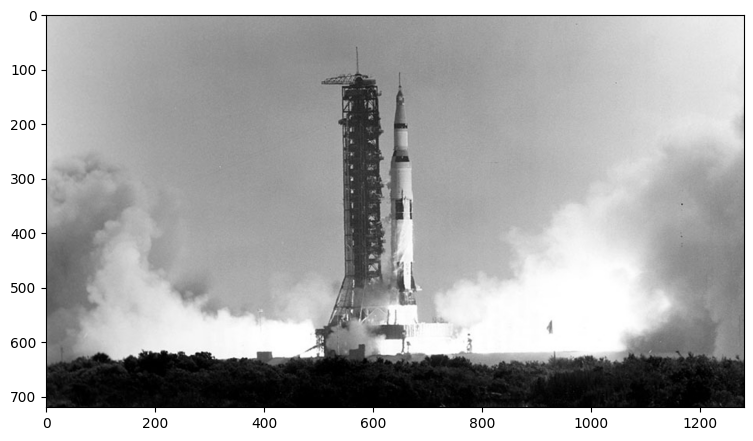

In [2]:
# Đọc hình ảnh
image = cv2.imread("images/Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Hiển thị ảnh gốc
plt.imshow(image[:, :, ::-1])

## Vẽ một đường


Chúng ta hãy bắt đầu bằng cách vẽ một đường trên một hình ảnh. Chúng ta sẽ sử dụng hàm `cv2.line` cho việc này.

### Cú pháp hàm
``` python
img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: Hình ảnh đầu ra đã được chú thích.

Hàm có **4 đối số bắt buộc**:

1. `img`: Hình ảnh mà chúng ta sẽ vẽ một đường thẳng

2. `pt1`: Điểm đầu tiên (vị trí x, y) của đoạn thẳng

3. `pt2`: Điểm thứ hai của đoạn thẳng

4. `color`: Màu của đường thẳng sẽ được vẽ

Các đối số tùy chọn khác mà chúng ta cần biết bao gồm:

1. `thickness`: Số nguyên chỉ định độ dày của đường thẳng. Giá trị mặc định là 1.

2. `lineType`: Kiểu của đường thẳng. Giá trị mặc định là 8, biểu thị cho đường thẳng được kết nối bằng 8. Thông thường, cv2.LINE_AA (đường thẳng khử răng cưa hoặc đường thẳng trơn) được sử dụng cho lineType.

### Tài liệu OpenCV
**`line`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2" target="_blank">Liên kết tài liệu</a>

Chúng ta hãy xem một ví dụ về điều này.

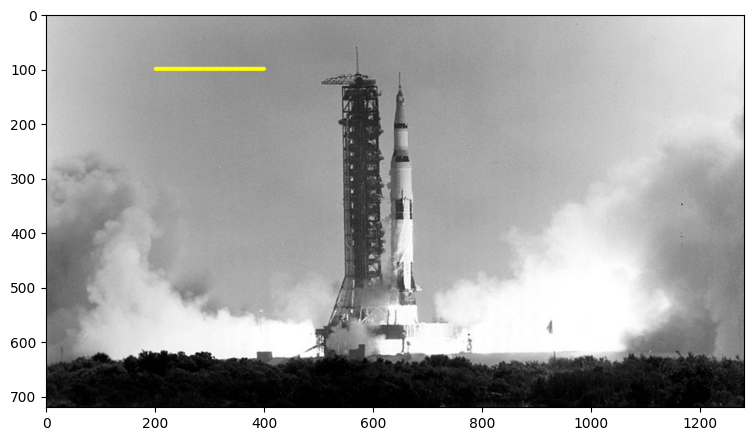

In [3]:
imageLine = image.copy()

# Dòng bắt đầu từ (200,100) và kết thúc tại (400,100)
# Màu của dòng là VÀNG (Nhớ rằng OpenCV sử dụng định dạng BGR)
# Độ dày của dòng là 5px
# Kiểu dòng là cv2.LINE_AA

cv2.line(imageLine, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

# Hiển thị hình ảnh
plt.imshow(imageLine[:,:,::-1])

## Vẽ một vòng tròn


Chúng ta hãy bắt đầu bằng cách vẽ một vòng tròn trên một hình ảnh. Chúng ta sẽ sử dụng hàm `cv2.circle` cho việc này.

### Cú pháp hàm
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: Hình ảnh đầu ra đã được chú thích.

Hàm có **4 đối số bắt buộc**:

1. `img`: Hình ảnh mà chúng ta sẽ vẽ một đường thẳng

2. `center`: Tâm của vòng tròn

3. `radius`: Bán kính của vòng tròn

4. `color`: Màu của vòng tròn sẽ được vẽ

Tiếp theo, chúng ta hãy xem xét các đối số (tùy chọn) mà chúng ta sẽ sử dụng khá rộng rãi.

1. `thickness`: Độ dày của đường viền hình tròn (nếu dương).
Nếu cung cấp giá trị âm cho đối số này, kết quả sẽ là một hình tròn được tô đầy.

2. `lineType`: Kiểu của đường viền hình tròn. Giống hệt như đối số lineType trong **cv2.line**

### Tài liệu OpenCV

**`circle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670" target="_blank">Liên kết tài liệu</a>

Chúng ta hãy xem một ví dụ về điều này.

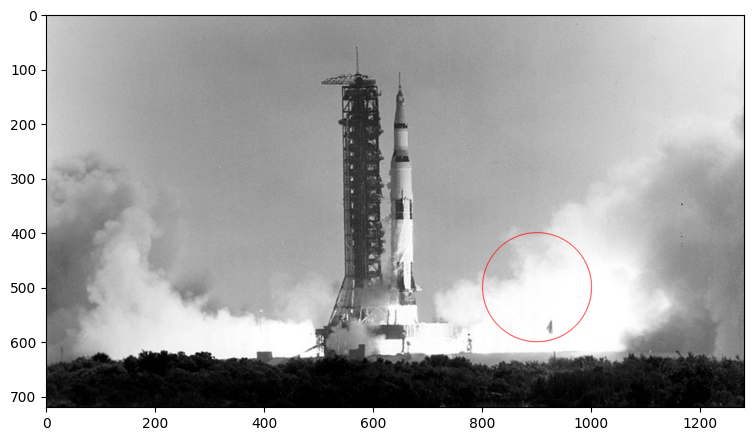

In [4]:
# Vẽ một vòng tròn
imageCircle = image.copy()

cv2.circle(imageCircle, (900,500), 100, (0, 0, 255), thickness=0, lineType=cv2.LINE_AA);

# Hiển thị hình ảnh
plt.imshow(imageCircle[:,:,::-1])

## Vẽ hình chữ nhật


Chúng ta sẽ sử dụng hàm `cv2.rectangle` để vẽ hình chữ nhật trên một hình ảnh. Cú pháp hàm như sau.

### Cú pháp hàm
``` python
img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```
`img`: Hình ảnh đầu ra đã được chú thích.

Hàm có **4 đối số bắt buộc**:

1. `img`: Hình ảnh mà hình chữ nhật sẽ được vẽ.

2. `pt1`: Đỉnh của hình chữ nhật. Thông thường chúng ta sử dụng **đỉnh trên cùng bên trái** ở đây.

3. `pt2`: Đỉnh của hình chữ nhật đối diện với `pt1`. Thông thường chúng ta sử dụng đỉnh **dưới cùng bên phải** ở đây.

4. `color`: Màu hình chữ nhật

Tiếp theo, hãy xem xét các đối số (tùy chọn) mà chúng ta sẽ sử dụng khá rộng rãi.

1. `thickness`: Độ dày của đường viền hình chữ nhật (nếu dương). Nếu cung cấp giá trị âm cho đối số này, kết quả sẽ là một hình chữ nhật được tô màu.

2. `lineType`: Kiểu của đường viền hình chữ nhật. Điều này giống hệt như đối số lineType trong
**cv2.line**

### Liên kết tài liệu OpenCV

**`rectangle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9" target="_blank">Liên kết tài liệu</a>

Hãy xem một ví dụ về điều này.

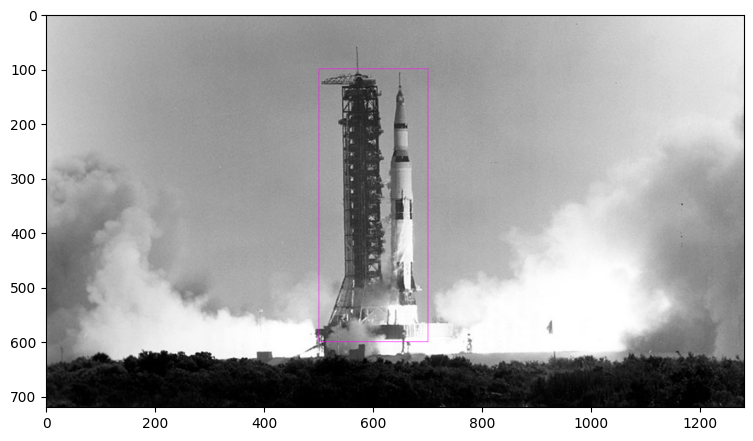

In [5]:
# Vẽ một hình chữ nhật (độ dày là một số nguyên dương)
imageRectangle = image.copy()

cv2.rectangle(imageRectangle, (500, 100), (700, 600), (255, 0, 255), thickness=1, lineType=cv2.LINE_8)

# Hiển thị hình ảnh
plt.imshow(imageRectangle[:, :, ::-1])

## Thêm văn bản


Cuối cùng, chúng ta hãy xem cách chúng ta có thể viết một số văn bản trên một hình ảnh bằng hàm **cv2.putText**.

### Cú pháp chức năng

img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: Hình ảnh đầu ra đã được chú thích.

Hàm có **6 đối số bắt buộc**:

1. `img`: Hình ảnh mà văn bản phải được viết vào.

2. `text`: Chuỗi văn bản cần được viết.

3. `org`: Góc dưới bên trái của chuỗi văn bản trong hình ảnh.

4. `fontFace`: Kiểu phông chữ

5. `fontScale`: Hệ số tỷ lệ phông chữ được nhân với kích thước cơ sở dành riêng cho phông chữ.

6. `color`: Màu phông chữ

Các đối số tùy chọn khác mà chúng ta cần biết bao gồm:

1. `thickness`: Số nguyên chỉ định độ dày của đường cho văn bản. Giá trị mặc định là 1.

2. `lineType`: Kiểu của đường. Giá trị mặc định là 8, biểu thị cho đường được kết nối 8. Thông thường, cv2.LINE_AA (đường khử răng cưa hoặc đường trơn) được sử dụng cho lineType.

### Tài liệu OpenCV

**`putText`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576" target="_blank">Liên kết tài liệu</a>

Chúng ta hãy xem một ví dụ về điều này.

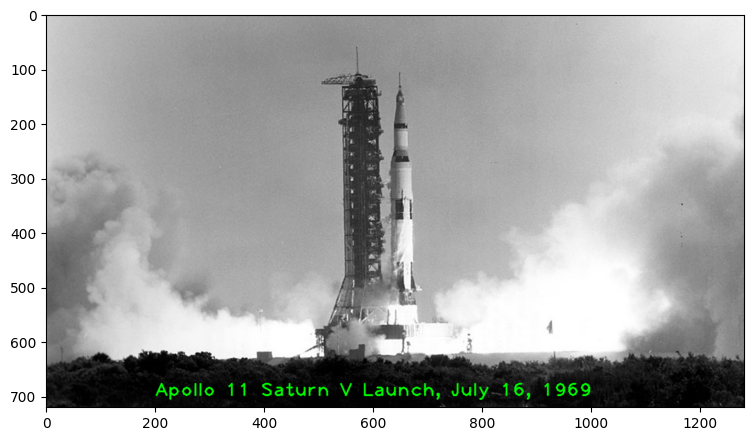

In [6]:
imageText = image.copy()
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA)

# Hiển thị hình ảnh
plt.imshow(imageText[:, :, ::-1])